# Project 11 - Credit card default propensity prediction

## Objective – 
Predict the probability of a customer defaulting payment for the credit card the subsequent month, based on past information. The past information is provided in the dataset. This probability will help the collections team to prioritise follow up with customers who have a high propensity of defaulting.
###  Project instructions

    Perform the required data pre-processing to treat for missing values and outliers
    Perform exploratory data analysis to visualise the spread of each of the X variables and the relationship between the various X variables and the Y variable
    Identify any multi-collinearity and perform dimensionality reduction like PCA if required
    Use the original X variables or the components from PCA & divide the given data into train and test sets
    Build a model to predict the default propensity of a customer
    Evaluate the model based on model performance measures for classification and recommend the most suitable model.
    Come up with recommendations / actionable insights based on feature importance scores derived from the model.

### About the dataset

The dataset contains the following information of 30000 customers:

There are 25 variables:

ID: ID of each client

LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit

SEX: Gender (1=male, 2=female)

EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)

MARRIAGE: Marital status (1=married, 2=single, 3=others)

AGE: Age in years

PAY_1: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, ... 8=payment delay for eight months, 9=payment delay for nine months and above)

PAY_2: Repayment status in August, 2005 (scale same as above)

PAY_3: Repayment status in July, 2005 (scale same as above)

PAY_4: Repayment status in June, 2005 (scale same as above)

PAY_5: Repayment status in May, 2005 (scale same as above)

PAY_6: Repayment status in April, 2005 (scale same as above)

BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)

BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)

BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)

BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)

BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)

BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)

PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)

PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)

PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)

PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)

PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)

PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)

default.payment.next.month: Default payment (1=yes, 0=no)

Inspiration Some ideas for exploration:

How does the probability of default payment vary by categories of different demographic variables?

Which variables are the strongest predictors of default payment?

Acknowledgements Any publications based on this dataset should acknowledge the following:

Lichman, M. (2013). UCI Machine Learning Repository [http://archive.ics.uci.edu/ml]. Irvine, CA: University of California, School of Information and Computer Science.

The original dataset can be found here at the UCI Machine Learning Repository.
### Additional information

    The difference between the bill amount and the past pay for a month will give an indication of the pending amount for each month and can be used as an additional X variable
    The average / sum of bill amount can be used as an add

In [2]:
import pyforest

In [3]:
data = pd.read_csv("credit_card.csv")
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [3]:
data.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [5]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID           30000 non-null int64
LIMIT_BAL    30000 non-null int64
SEX          30000 non-null int64
EDUCATION    30000 non-null int64
MARRIAGE     30000 non-null int64
AGE          30000 non-null int64
PAY_1        30000 non-null int64
PAY_2        30000 non-null int64
PAY_3        30000 non-null int64
PAY_4        30000 non-null int64
PAY_5        30000 non-null int64
PAY_6        30000 non-null int64
BILL_AMT1    30000 non-null int64
BILL_AMT2    30000 non-null int64
BILL_AMT3    30000 non-null int64
BILL_AMT4    30000 non-null int64
BILL_AMT5    30000 non-null int64
BILL_AMT6    30000 non-null int64
PAY_AMT1     30000 non-null int64
PAY_AMT2     30000 non-null int64
PAY_AMT3     30000 non-null int64
PAY_AMT4     30000 non-null int64
PAY_AMT5     30000 non-null int64
PAY_AMT6     30000 non-null int64
DEFAULT      30000 non-null int64
dtypes: int64(25)
memory usage: 5.7 MB
No

In [10]:
data.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'DEFAULT'],
      dtype='object')

In [14]:
data['DEFAULT'].value_counts()

0    23364
1     6636
Name: DEFAULT, dtype: int64

In [17]:
data.nunique()

ID           30000
LIMIT_BAL       81
SEX              2
EDUCATION        7
MARRIAGE         4
AGE             56
PAY_1           11
PAY_2           11
PAY_3           11
PAY_4           11
PAY_5           10
PAY_6           10
BILL_AMT1    22723
BILL_AMT2    22346
BILL_AMT3    22026
BILL_AMT4    21548
BILL_AMT5    21010
BILL_AMT6    20604
PAY_AMT1      7943
PAY_AMT2      7899
PAY_AMT3      7518
PAY_AMT4      6937
PAY_AMT5      6897
PAY_AMT6      6939
DEFAULT          2
dtype: int64

In [4]:
print(data.EDUCATION.value_counts())
print(data['MARRIAGE'].value_counts())

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64
2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64


Info given to us was:
    
EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)

MARRIAGE: Marital status (1=married, 2=single, 3=others)
So there is unwanted classes 


In [5]:
df = (data.EDUCATION == 5) | (data.EDUCATION == 6) | (data.EDUCATION == 0) 
data.loc[df,'EDUCATION']=4
print(data['EDUCATION'].value_counts())

2    14030
1    10585
3     4917
4      468
Name: EDUCATION, dtype: int64


In [6]:
df1 = (data.MARRIAGE == 3)
data.loc[df1,'MARRIAGE'] = 0
print(data['MARRIAGE'].value_counts())

2    15964
1    13659
0      377
Name: MARRIAGE, dtype: int64


In [7]:
print("DEFAULT Probabilty:",data.DEFAULT.sum()/len(data.DEFAULT)*100)

DEFAULT Probabilty: 22.12


22.12% customers are defaulters 

## EDA

### Univariate


The columns in the dataset are either Numerical or categorical.

For Numerical Columns - Create a Histogram | Distplot

Histogram is a Statistical Plot that tells me how is the Data Being Distrib uted. If it is not normal (Bell Shaped), then it would be skewed.

For Categorical Column, we create a BARPLOT/Frequency/Count Plot

BILL_AMT1


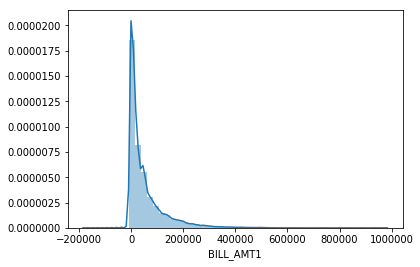

BILL_AMT2


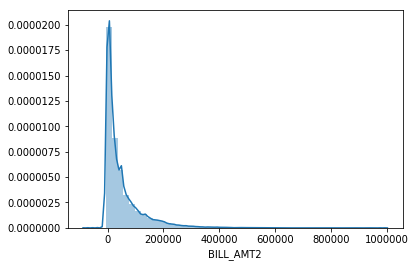

BILL_AMT3


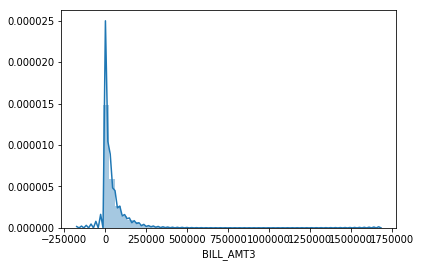

BILL_AMT4


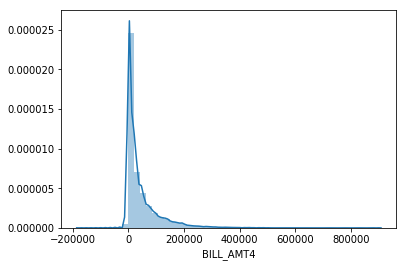

BILL_AMT5


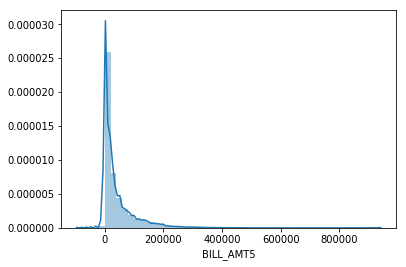

BILL_AMT6


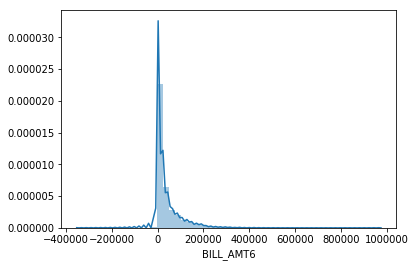

PAY_AMT1


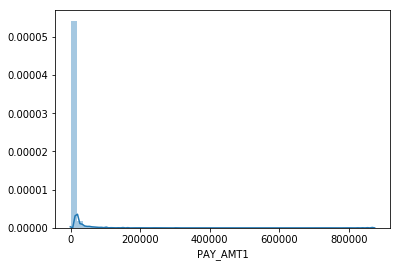

PAY_AMT2


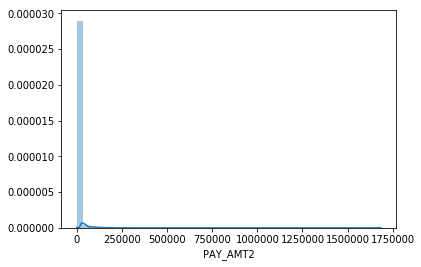

PAY_AMT3


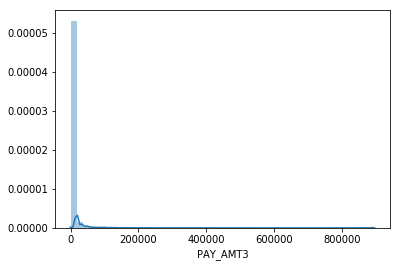

PAY_AMT4


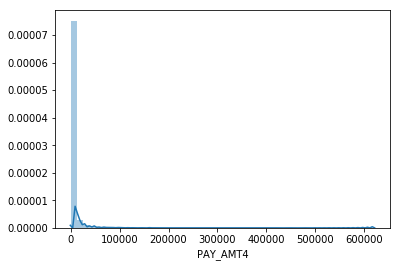

PAY_AMT5


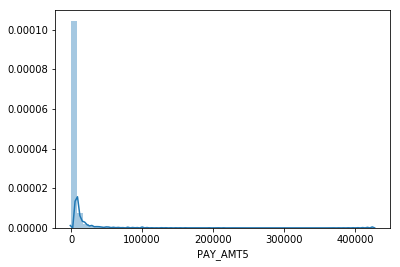

PAY_AMT6


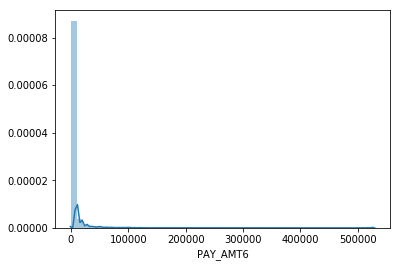

In [40]:
for i in data[['BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']]:
    print(i)
    sns.distplot(data[i])
    plt.show()

'BILL_AMT1', 'BILL_AMT2','BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
'PAY_AMT1','PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'
are positively skewed and are not normally distributed.


BILL_AMT1


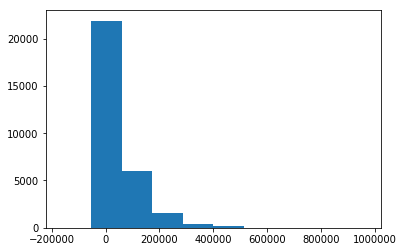

BILL_AMT2


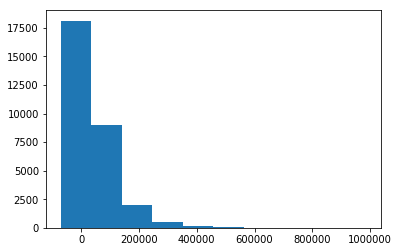

BILL_AMT3


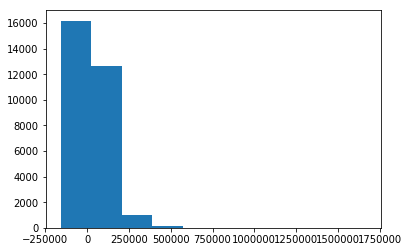

BILL_AMT4


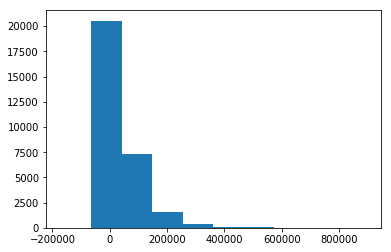

BILL_AMT5


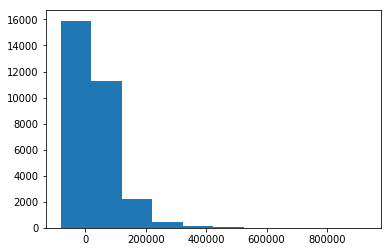

BILL_AMT6


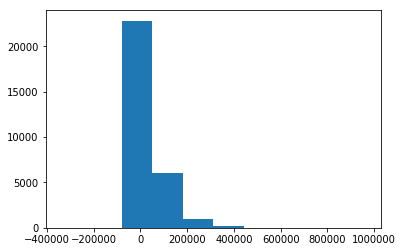

PAY_AMT1


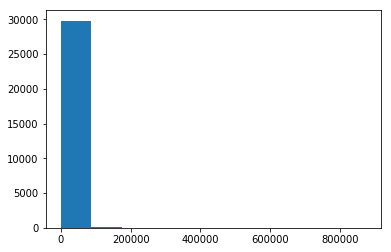

PAY_AMT2


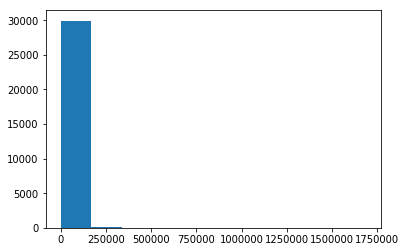

PAY_AMT3


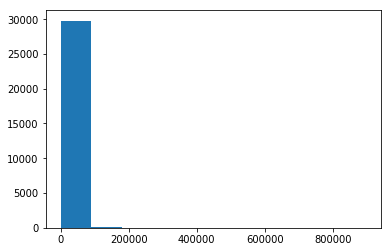

PAY_AMT4


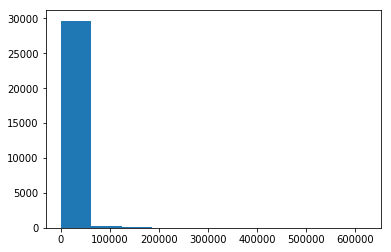

PAY_AMT5


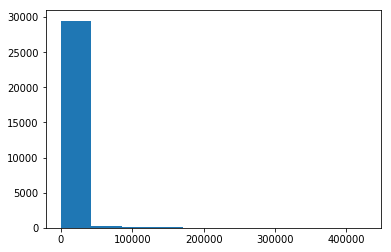

PAY_AMT6


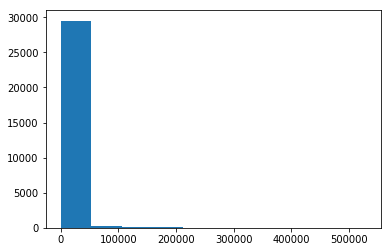

In [44]:
for i in data[['BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']]:
    print(i)
    plt.hist(data[i])
    plt.show()

BILL_AMT1


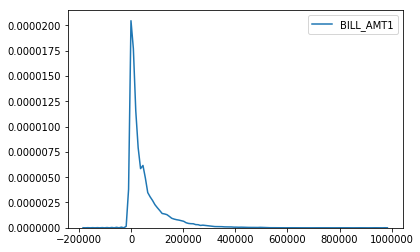

BILL_AMT2


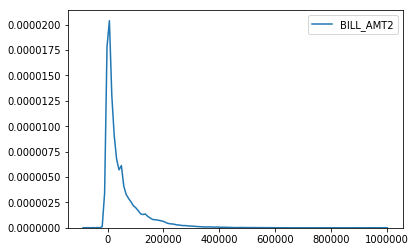

BILL_AMT3


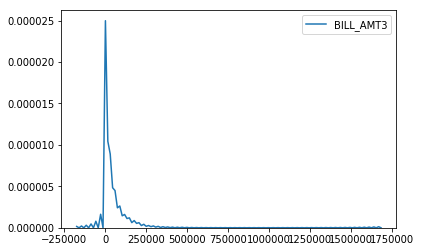

BILL_AMT4


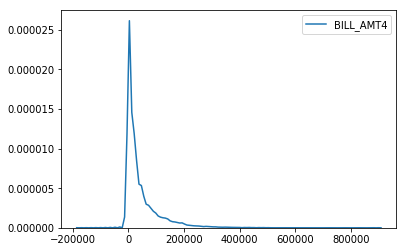

BILL_AMT5


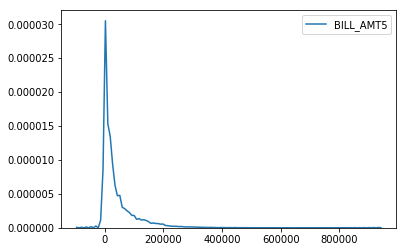

BILL_AMT6


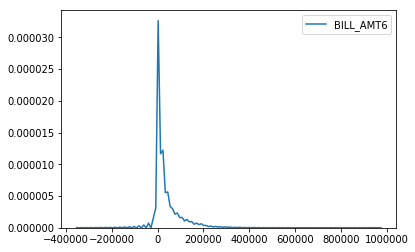

PAY_AMT1


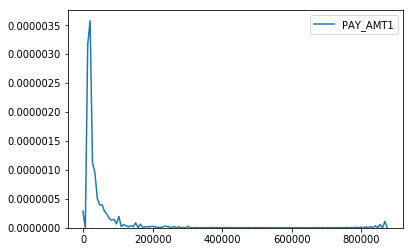

PAY_AMT2


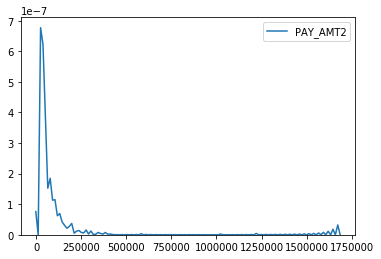

PAY_AMT3


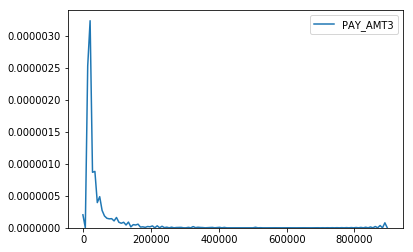

PAY_AMT4


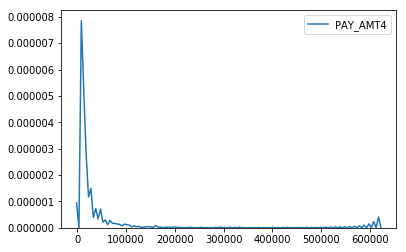

PAY_AMT5


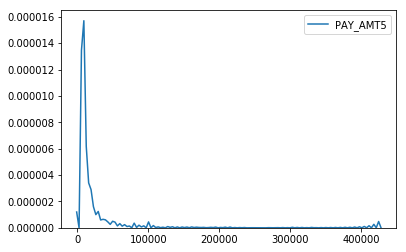

PAY_AMT6


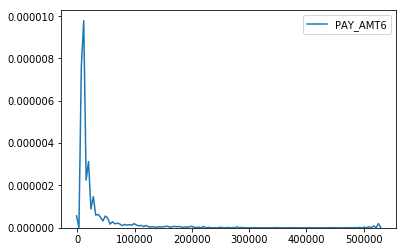

In [48]:
for i in data[['BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']]:
    print(i)
    sns.kdeplot(data[i])
    plt.show()

SEX


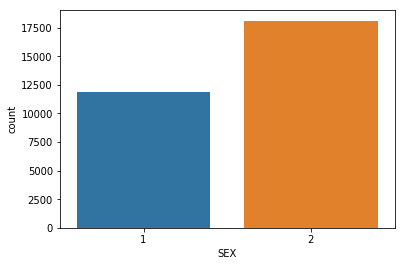

EDUCATION


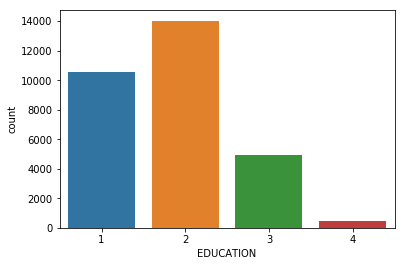

MARRIAGE


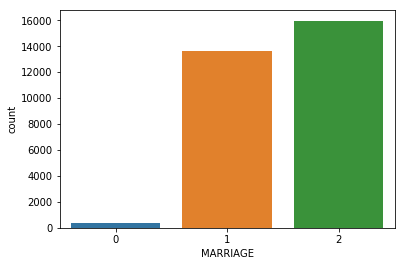

In [50]:
for i in data[['SEX', 'EDUCATION', 'MARRIAGE']]:
    print(i)
    sns.countplot(data[i])
    plt.show()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55]), <a list of 56 Text xticklabel objects>)

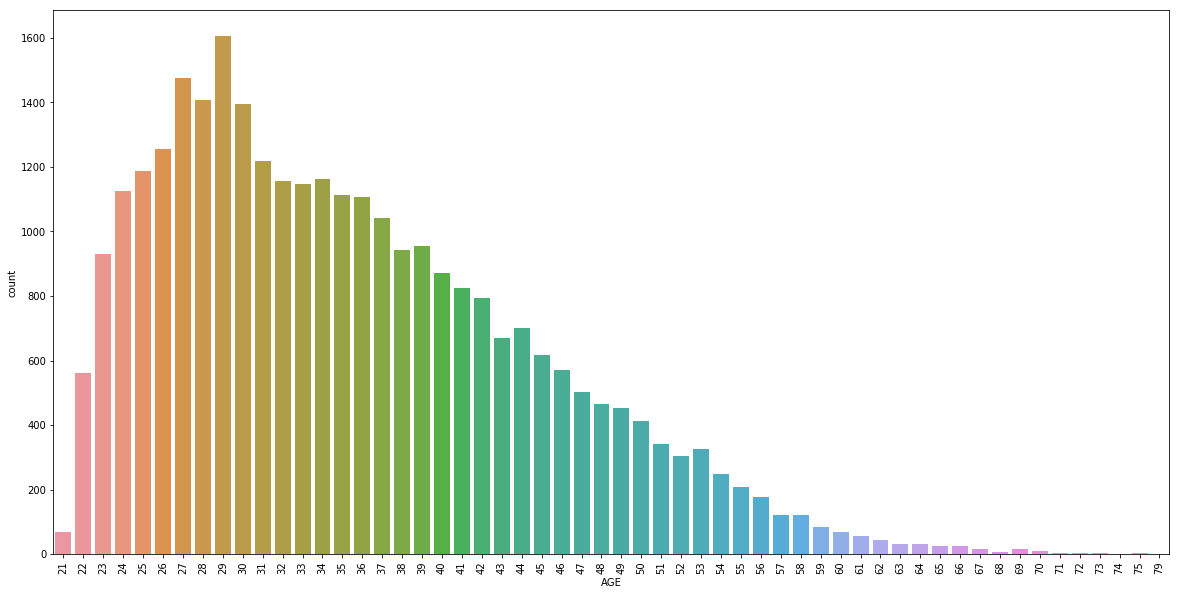

In [53]:
plt.figure(figsize=(20,10))
sns.countplot(data.AGE)
#data.AGE.value_counts().sort_index().plot(kind = "bar")
plt.xticks(rotation=90)

customers whose age is 29 are more

### Bivariate Analysis

    Num vs Num - Scatterplot

    Cat Vs Num - Boxplot (Statistical Plot) | Violin Plot

    Cat Vs Cat - pd.crosstab | Table - Frequency



AxesSubplot(0.125,0.125;0.775x0.755)


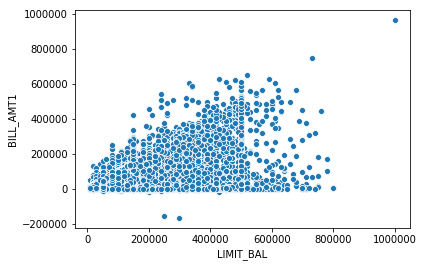

In [57]:
print(sns.scatterplot(data.LIMIT_BAL,data.BILL_AMT1))


AxesSubplot(0.125,0.125;0.775x0.755)


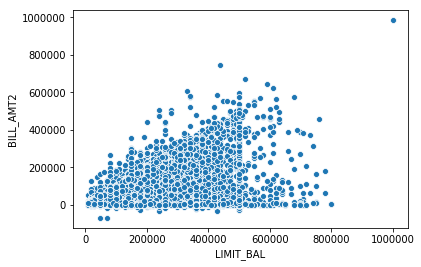

In [58]:
print(sns.scatterplot(data.LIMIT_BAL,data.BILL_AMT2))

LIMIT_BAL


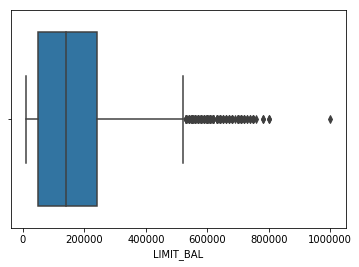

SEX


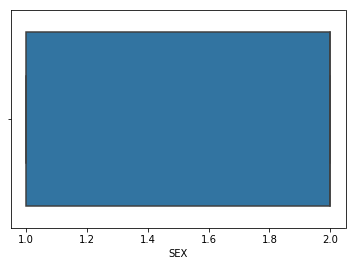

EDUCATION


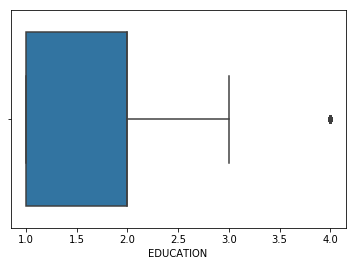

MARRIAGE


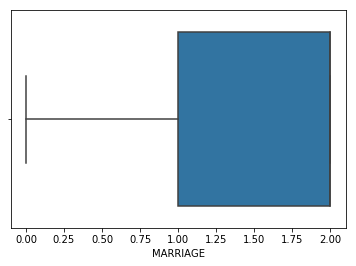

AGE


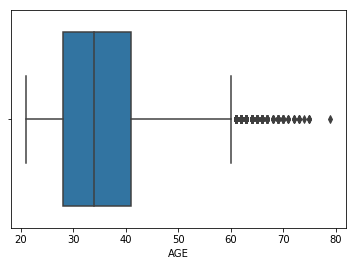

PAY_1


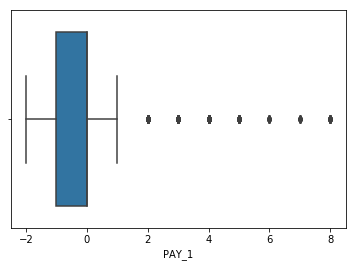

PAY_2


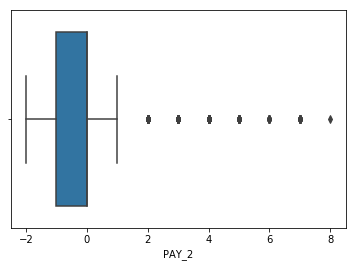

PAY_3


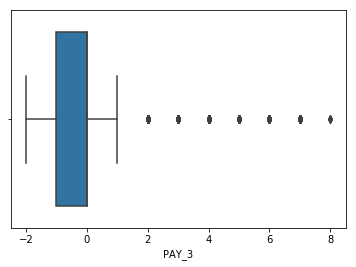

PAY_4


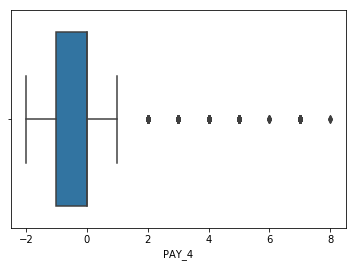

PAY_5


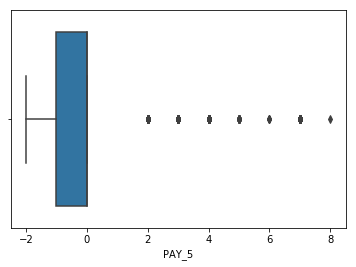

PAY_6


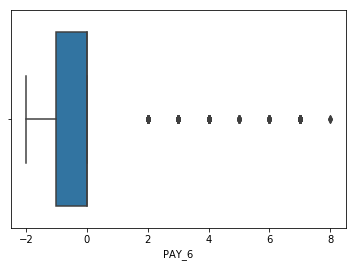

BILL_AMT1


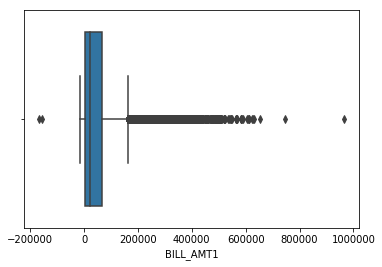

BILL_AMT2


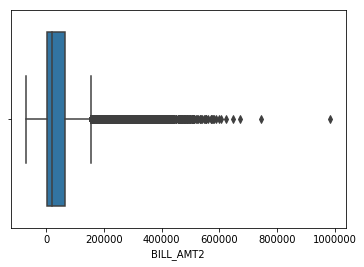

BILL_AMT3


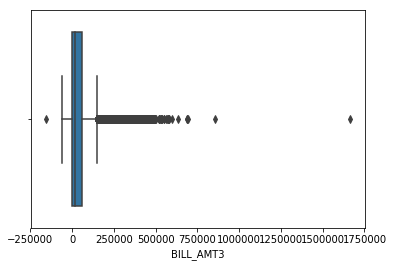

BILL_AMT4


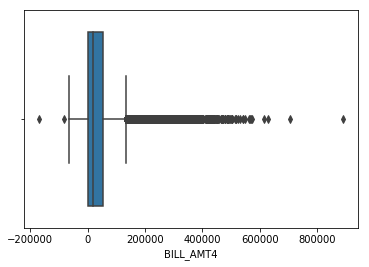

BILL_AMT5


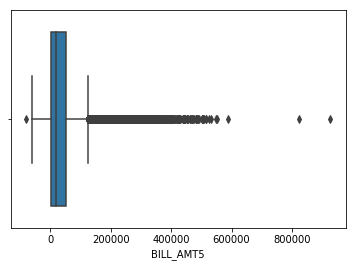

BILL_AMT6


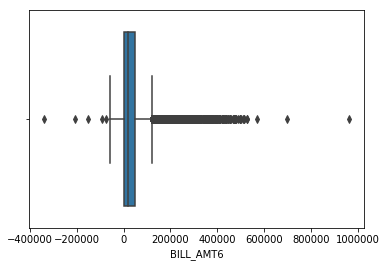

PAY_AMT1


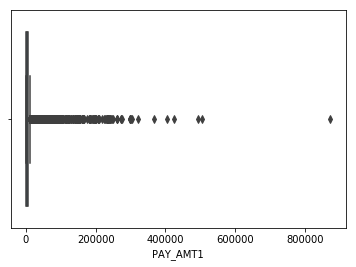

PAY_AMT2


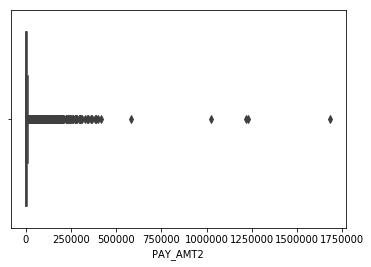

PAY_AMT3


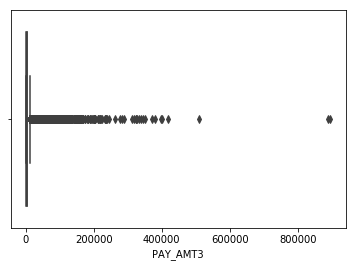

PAY_AMT4


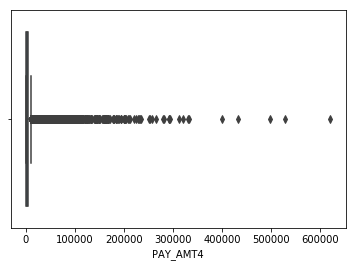

PAY_AMT5


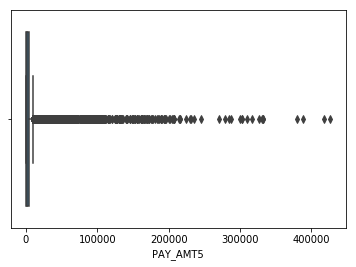

PAY_AMT6


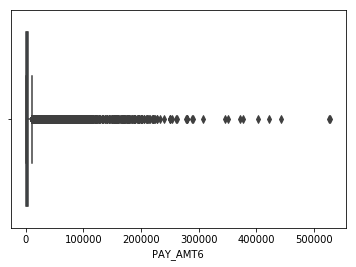

In [59]:
for i in data[['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']]:
    print(i)
    sns.boxplot(data[i])
    plt.show()

There are outliers in all numerical columns

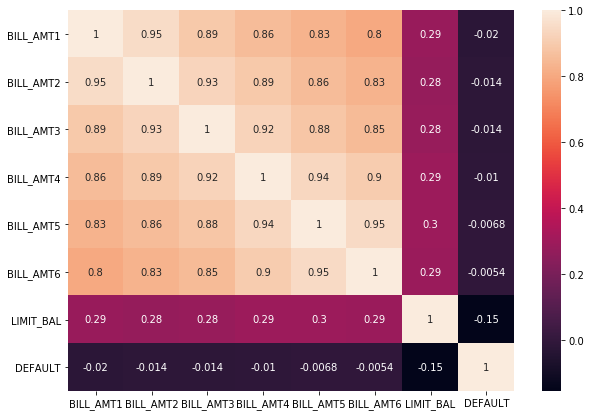

In [64]:
plt.figure(figsize=(10,7))
bill_heat = ['BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6','LIMIT_BAL','DEFAULT']
sns.heatmap(data[bill_heat].corr(),annot= True)


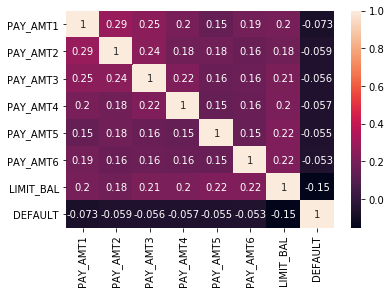

In [67]:
payamt_heat = ['PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',"LIMIT_BAL","DEFAULT"]
sns.heatmap(data[payamt_heat].corr(),annot= True)

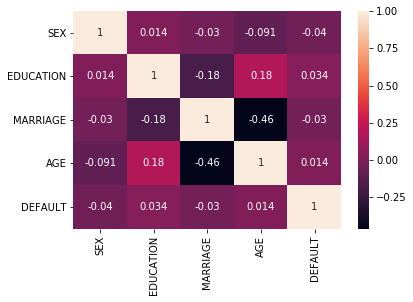

In [72]:
cat_heat = ['SEX','EDUCATION','MARRIAGE','AGE','DEFAULT']
sns.heatmap(data[cat_heat].corr(),annot=True)

In [93]:
data['AGE_CAT'] = pd.cut(data.AGE, [20,40,60,81], labels=["young","middle","senior"])
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT,AGE_GROUP,PAY_TOTAL,RISK_CAT,AGE_CAT
0,1,20000,2,2,1,24,2,2,-1,-1,...,689,0,0,0,0,1,young,-2,medium,young
1,2,120000,2,2,2,26,-1,2,0,0,...,1000,1000,1000,0,2000,1,young,3,high,young
2,3,90000,2,2,2,34,0,0,0,0,...,1500,1000,1000,1000,5000,0,young,0,medium,young
3,4,50000,2,2,1,37,0,0,0,0,...,2019,1200,1100,1069,1000,0,young,0,medium,young
4,5,50000,1,2,1,57,-1,0,-1,0,...,36681,10000,9000,689,679,0,middle,-2,medium,middle


In [95]:
data['AGE_CAT'].unique()

[young, middle, senior]
Categories (3, object): [young < middle < senior]

In [11]:
data['PAY_TOTAL'] = (data.PAY_1 + data.PAY_2 + data.PAY_3 + data.PAY_4 + data.PAY_5 + data.PAY_6)

In [17]:
data['PAY_TOTAL'].unique()

array([ -2,   3,   0,  -3,   2, -10,   1,  -5,   7,   8,  -9,  -1,  -6,
       -12,  -7,   9,  10,  12,  -8,   6,   4,  13,  24,   5,  -4,  19,
        11,  16,  33,  31,  14,  17,  32,  21,  22, -11,  15,  20,  27,
        25,  18,  36,  23,  30,  29,  28,  26], dtype=int64)

In [97]:
data.drop('AGE_GROUP',axis=1, inplace=True)

In [100]:
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT,PAY_TOTAL,RISK_CAT,AGE_CAT
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,689,0,0,0,0,1,-2,medium,young
1,2,120000,2,2,2,26,-1,2,0,0,...,0,1000,1000,1000,0,2000,1,3,high,young
2,3,90000,2,2,2,34,0,0,0,0,...,1518,1500,1000,1000,1000,5000,0,0,medium,young
3,4,50000,2,2,1,37,0,0,0,0,...,2000,2019,1200,1100,1069,1000,0,0,medium,young
4,5,50000,1,2,1,57,-1,0,-1,0,...,2000,36681,10000,9000,689,679,0,-2,medium,middle


In [146]:
data['RISK_CAT'] = pd.cut(data.PAY_TOTAL, [-20,-10,0,40], labels=["low","medium","high"])
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT,PAY_TOTAL,RISK_CAT,AGE_CAT
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,689,0,0,0,0,1,-2,medium,young
1,2,120000,2,2,2,26,-1,2,0,0,...,0,1000,1000,1000,0,2000,1,3,high,young
2,3,90000,2,2,2,34,0,0,0,0,...,1518,1500,1000,1000,1000,5000,0,0,medium,young
3,4,50000,2,2,1,37,0,0,0,0,...,2000,2019,1200,1100,1069,1000,0,0,medium,young
4,5,50000,1,2,1,57,-1,0,-1,0,...,2000,36681,10000,9000,689,679,0,-2,medium,middle


In [150]:
data['RISK_CAT'].isnull().sum()

0

In [152]:
data_new = data.copy()

In [153]:
risk_map = {'low':0,'medium':1,'high':2}

In [154]:
risk_map = {'low':0,'medium':1,'high':2}
data_new['RISK_CAT'] =  data_new['RISK_CAT'].map(risk_map)

In [155]:
data_new.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT,PAY_TOTAL,RISK_CAT,AGE_CAT
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,689,0,0,0,0,1,-2,1,young
1,2,120000,2,2,2,26,-1,2,0,0,...,0,1000,1000,1000,0,2000,1,3,2,young
2,3,90000,2,2,2,34,0,0,0,0,...,1518,1500,1000,1000,1000,5000,0,0,1,young
3,4,50000,2,2,1,37,0,0,0,0,...,2000,2019,1200,1100,1069,1000,0,0,1,young
4,5,50000,1,2,1,57,-1,0,-1,0,...,2000,36681,10000,9000,689,679,0,-2,1,middle


In [156]:
data.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'DEFAULT',
       'PAY_TOTAL', 'RISK_CAT', 'AGE_CAT'],
      dtype='object')

In [157]:
pd.crosstab(data['DEFAULT'],data['RISK_CAT'])

RISK_CAT,low,medium,high
DEFAULT,,,
0,2138,17570,3656
1,352,2807,3477


In [158]:
import pandas      as pd
import numpy       as np
import scipy.stats as stats
a = data_new['RISK_CAT'].values
b = data_new['DEFAULT'].values

quality_array = np.array([[2138,17570,3211],[352,2807,2466]])
chi_sq_Stat, p_value, deg_freedom, exp_freq = stats.chi2_contingency(quality_array)

print('Chi-square statistic %3.8f P value %1.5f Degrees of freedom %d' %(chi_sq_Stat, p_value,deg_freedom))
print(p_value)

Chi-square statistic 2522.53287592 P value 0.00000 Degrees of freedom 2
0.0


In [159]:
data_new.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT,PAY_TOTAL,RISK_CAT,AGE_CAT
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,689,0,0,0,0,1,-2,1,young
1,2,120000,2,2,2,26,-1,2,0,0,...,0,1000,1000,1000,0,2000,1,3,2,young
2,3,90000,2,2,2,34,0,0,0,0,...,1518,1500,1000,1000,1000,5000,0,0,1,young
3,4,50000,2,2,1,37,0,0,0,0,...,2000,2019,1200,1100,1069,1000,0,0,1,young
4,5,50000,1,2,1,57,-1,0,-1,0,...,2000,36681,10000,9000,689,679,0,-2,1,middle


In [160]:
data_new['AGE_CAT'].unique()

[young, middle, senior]
Categories (3, object): [young < middle < senior]

In [161]:
age_map = {'young':0,'middle':1,'senior':2}
data_new['AGE_CAT'] = data_new['AGE_CAT'].map(age_map)

In [162]:
data_new.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT,PAY_TOTAL,RISK_CAT,AGE_CAT
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,689,0,0,0,0,1,-2,1,0
1,2,120000,2,2,2,26,-1,2,0,0,...,0,1000,1000,1000,0,2000,1,3,2,0
2,3,90000,2,2,2,34,0,0,0,0,...,1518,1500,1000,1000,1000,5000,0,0,1,0
3,4,50000,2,2,1,37,0,0,0,0,...,2000,2019,1200,1100,1069,1000,0,0,1,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,2000,36681,10000,9000,689,679,0,-2,1,1


In [163]:
pd.crosstab(data['DEFAULT'],data['AGE_CAT'])

AGE_CAT,young,middle,senior
DEFAULT,,,
0,17066,6099,199
1,4660,1903,73


In [164]:
import pandas      as pd
import numpy       as np
import scipy.stats as stats
a = data_new['RISK_CAT'].values
b = data_new['DEFAULT'].values

quality_array = np.array([[17066,6099,199],[4660,1903,73]])
chi_sq_Stat, p_value, deg_freedom, exp_freq = stats.chi2_contingency(quality_array)

print('Chi-square statistic %3.8f P value %1.5f Degrees of freedom %d' %(chi_sq_Stat, p_value,deg_freedom))
print(p_value)

Chi-square statistic 22.01773124 P value 0.00002 Degrees of freedom 2
1.6554284303886136e-05


Pvalue for Default vs Risk_cat is less than 0.05

Pvalue for Default vs Age_Cat is also less than 0.05

Hence we reject the null hypothesis.

There is association between the 2 variables with the target vairable.

In [165]:
data_new_new = data_new.copy()

In [166]:
data_new_new.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'DEFAULT',
       'PAY_TOTAL', 'RISK_CAT', 'AGE_CAT'],
      dtype='object')

In [167]:
data_new_new.drop(['AGE', 'PAY_1','PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6','PAY_TOTAL'],axis=1,inplace=True)

In [168]:
data_new_new.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT,RISK_CAT,AGE_CAT
0,1,20000,2,2,1,3913,3102,689,0,0,0,0,689,0,0,0,0,1,1,0
1,2,120000,2,2,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1,2,0
2,3,90000,2,2,2,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0,1,0
3,4,50000,2,2,1,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0,1,0
4,5,50000,1,2,1,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0,1,1


In [169]:
data_new_new.corr()['DEFAULT'][1:]

LIMIT_BAL   -0.153520
SEX         -0.039961
EDUCATION    0.033842
MARRIAGE    -0.030006
BILL_AMT1   -0.019644
BILL_AMT2   -0.014193
BILL_AMT3   -0.014076
BILL_AMT4   -0.010156
BILL_AMT5   -0.006760
BILL_AMT6   -0.005372
PAY_AMT1    -0.072929
PAY_AMT2    -0.058579
PAY_AMT3    -0.056250
PAY_AMT4    -0.056827
PAY_AMT5    -0.055124
PAY_AMT6    -0.053183
DEFAULT      1.000000
RISK_CAT     0.309264
AGE_CAT      0.027047
Name: DEFAULT, dtype: float64

In [170]:
# Random Forest

In [129]:
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection
from sklearn import metrics
#from sklearn.decomposition import PCA
from scipy.stats import zscore
import matplotlib.pyplot as plt 
import warnings

In [171]:
Rf_model = RandomForestClassifier(n_estimators=173,criterion='entropy',random_state=0 )

In [172]:
data_new_new.drop('ID',axis=1,inplace=True)

In [446]:
data_new_new.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT,RISK_CAT,AGE_CAT
0,20000,2,2,1,3913,3102,689,0,0,0,0,689,0,0,0,0,1,1,0
1,120000,2,2,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1,2,0
2,90000,2,2,2,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0,1,0
3,50000,2,2,1,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0,1,0
4,50000,1,2,1,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0,1,1


In [447]:
X = data_new_new.drop('DEFAULT',axis=1)
y = data_new_new['DEFAULT']

In [448]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X,y, test_size=0.25, random_state=0)
Rf_model.fit(xtrain,ytrain)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=173,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [449]:
imp_feat = Rf_model.feature_importances_

In [450]:
imp_feat

array([0.07460106, 0.01452092, 0.02432446, 0.01582728, 0.07925447,
       0.06964746, 0.06601547, 0.06494221, 0.06434726, 0.06417528,
       0.06837233, 0.06487976, 0.05885305, 0.05548327, 0.05394955,
       0.05774699, 0.08942257, 0.01363662])

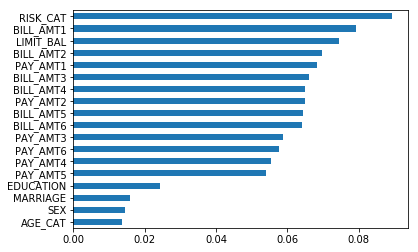

In [451]:

import matplotlib.pyplot as plt
pd.Series(imp_feat,index=X.columns).sort_values().plot(kind='barh')

In [198]:
len(X.columns)

18

In [452]:
Rf_model.score(xtrain,ytrain)

0.9970666666666667

In [453]:
Rf_model.score(xtest,ytest)

0.7905333333333333

In [203]:
X.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'RISK_CAT',
       'AGE_CAT'],
      dtype='object')

In [216]:
X1 = X[['LIMIT_BAL', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'RISK_CAT']]
y1 = data_new_new['DEFAULT']
Rf_model1 = RandomForestClassifier(n_estimators=173,criterion='entropy',random_state=0)
Rf_model1.fit(X1,y1)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=173,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [217]:
Rf_model1.score(X1,y1)

0.9902666666666666

In [219]:
from sklearn.metrics import confusion_matrix
cn = confusion_matrix(y1,Rf_model1.predict(X1))

In [220]:
cn

array([[23262,   102],
       [  190,  6446]], dtype=int64)

In [224]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=100)
lr.fit(X1,y1)

C:\Users\akash\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [240]:
lr.score(X1,y1)

In [226]:
print(confusion_matrix(y1,lr.predict(X1)))

[[23362     2]
 [ 6636     0]]


In [227]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X1,y1)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [228]:
dt.score(X1,y1)

0.9902666666666666

In [229]:
print(confusion_matrix(y1,dt.predict(X1)))

[[23285    79]
 [  213  6423]]


In [231]:
data_new_new['DEFAULT'].value_counts()

0    23364
1     6636
Name: DEFAULT, dtype: int64

In [233]:
from imblearn.over_sampling import SMOTE

In [234]:
smote = SMOTE(ratio = "minority")

In [236]:
smote = SMOTE(ratio = "minority")
x_smote,y_smote= smote.fit_sample(X,y)

In [237]:
print("After Oversampling the shape of xtrain is ",x_smote.shape)

After Oversampling the shape of xtrain is  (46728, 18)


In [238]:
print("After Oversampling the shape of ytrain is ",y_smote.shape)

After Oversampling the shape of ytrain is  (46728,)


In [239]:
print("the count of 1 is ", sum(y_smote==1))
print("the count of 0 is ", sum(y_smote==0))

the count of 1 is  23364
the count of 0 is  23364


In [246]:
y_smote

array([1, 1, 0, ..., 1, 1, 1], dtype=int64)

In [383]:
CV_rfc = GridSearchCV(estimator=rf, param_grid=param_grid, cv= 5)
CV_rfc.fit(x_smote, y_smote)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=173, n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid='w

In [384]:
Rf_model_smote = RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=173, n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False)
Rf_model_smote.fit(x_smote,y_smote)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=173,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [393]:
pred = Rf_model_smote.predict(x_smote)

In [394]:
from sklearn.metrics import accuracy_score,classification_report, cohen_kappa_score
print("The Kappa score is",cohen_kappa_score(y_smote,pred))
print(classification_report(y_smote,pred))

The Kappa score is 0.9916538263995891
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     23364
           1       0.99      1.00      1.00     23364

    accuracy                           1.00     46728
   macro avg       1.00      1.00      1.00     46728
weighted avg       1.00      1.00      1.00     46728



In [388]:
len(X.columns)

18

In [395]:
print(confusion_matrix(y_smote,pred))

[[23225   139]
 [   56 23308]]


In [290]:
data_df = data.copy()

In [291]:
data_df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT,PAY_TOTAL,RISK_CAT,AGE_CAT
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,689,0,0,0,0,1,-2,medium,young
1,2,120000,2,2,2,26,-1,2,0,0,...,0,1000,1000,1000,0,2000,1,3,high,young
2,3,90000,2,2,2,34,0,0,0,0,...,1518,1500,1000,1000,1000,5000,0,0,medium,young
3,4,50000,2,2,1,37,0,0,0,0,...,2000,2019,1200,1100,1069,1000,0,0,medium,young
4,5,50000,1,2,1,57,-1,0,-1,0,...,2000,36681,10000,9000,689,679,0,-2,medium,middle


In [328]:
data_df = data_df.drop(['PAY_TOTAL'],axis=1)

In [329]:
x = data_df.drop('DEFAULT',axis=1)
y = data['DEFAULT']

In [330]:
from sklearn.model_selection import train_test_split

In [337]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state = None)

In [369]:
rf = RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=173, n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False)

In [368]:
CV_rfc = GridSearchCV(estimator=rf, param_grid=param_grid, cv= 5)
CV_rfc.fit(x_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=173, n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid='w

In [370]:
x_train_reset,y_train_reset = smote.fit_sample(x_train,y_train)
x_test_reset,y_test_reset = smote.fit_sample(x_test,y_test)

In [371]:
print("After Oversampling the shape of xtrain is ",x_train_reset.shape)
print("After Oversampling the shape of ytrain is ",y_train_reset.shape)

After Oversampling the shape of xtrain is  (32770, 24)
After Oversampling the shape of ytrain is  (32770,)


In [372]:
print("After Oversampling the shape of xtest is ",x_test_reset.shape)
print("After Oversampling the shape of ytest is ",y_test_reset.shape)

After Oversampling the shape of xtest is  (13958, 24)
After Oversampling the shape of ytest is  (13958,)


In [373]:

print("the count of 1 is ", sum(y_train_reset==1))
print("the count of 0 is ", sum(y_train_reset==0))

the count of 1 is  16385
the count of 0 is  16385


In [382]:
from sklearn.metrics import accuracy_score,classification_report, cohen_kappa_score
pred1 = rf.fit(x_train_reset,y_train_reset).predict(x_test_reset)
acc = accuracy_score(y_test_reset,pred)
print("The Accuracy is {}".format(accuracy_score(y_test_reset, 
                                                 pred1)))
print("The Kappa score is {} ".format(cohen_kappa_score(y_test_reset,pred1)))
print((classification_report(y_test_reset,pred1)))
print(confusion_matrix(y_test_reset,pred1))

The Accuracy is 0.7862874337297607
The Kappa score is 0.5725748674595215 
              precision    recall  f1-score   support

           0       0.75      0.87      0.80      6979
           1       0.84      0.71      0.77      6979

    accuracy                           0.79     13958
   macro avg       0.79      0.79      0.78     13958
weighted avg       0.79      0.79      0.78     13958

[[6040  939]
 [2044 4935]]


In [397]:
data_new.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT,PAY_TOTAL,RISK_CAT,AGE_CAT
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,689,0,0,0,0,1,-2,1,0
1,2,120000,2,2,2,26,-1,2,0,0,...,0,1000,1000,1000,0,2000,1,3,2,0
2,3,90000,2,2,2,34,0,0,0,0,...,1518,1500,1000,1000,1000,5000,0,0,1,0
3,4,50000,2,2,1,37,0,0,0,0,...,2000,2019,1200,1100,1069,1000,0,0,1,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,2000,36681,10000,9000,689,679,0,-2,1,1


In [399]:
X=data_new.drop('DEFAULT',axis=1)

In [401]:
y=data_new['DEFAULT']

In [425]:
x_train1,x_test1,y_train1,y_test1 = train_test_split(X,y,test_size=0.25,random_state=None)

In [426]:
log_reg = LogisticRegression()
log_reg.fit(x_train1,y_train1)

y_predict = log_reg.predict(x_test1)
log_score_test = log_reg.score(x_test1,y_test1)

log_score_train = log_reg.score(x_train1,y_train1)

print("Testing",log_score_test)
print("Training",log_score_train)

C:\Users\akash\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Testing 0.7797333333333333
Training 0.7804888888888889


In [427]:
print(metrics.confusion_matrix(y_test1, y_predict))
print(metrics.classification_report(y_test1, y_predict))


[[5828    6]
 [1646   20]]
              precision    recall  f1-score   support

           0       0.78      1.00      0.88      5834
           1       0.77      0.01      0.02      1666

    accuracy                           0.78      7500
   macro avg       0.77      0.51      0.45      7500
weighted avg       0.78      0.78      0.69      7500



In [428]:
smote1 = SMOTE(ratio = "minority")
x_smote1,y_smote1= smote1.fit_sample(X,y)

In [429]:
x_train_reset1,y_train_reset1 = smote1.fit_sample(x_train,y_train)
x_test_reset1,y_test_reset1 = smote1.fit_sample(x_test,y_test)

In [430]:
print("the count of 1 is ", sum(y_smote==1))
print("the count of 0 is ", sum(y_smote==0))

the count of 1 is  23364
the count of 0 is  23364


In [431]:
from sklearn.metrics import accuracy_score,classification_report, cohen_kappa_score
pred1 = log_reg.fit(x_train_reset1,y_train_reset1).predict(x_test_reset1)
acc = accuracy_score(y_test_reset1,y_predict)
print("The Accuracy is {}".format(accuracy_score(y_test_reset1, 
                                                 pred1)))
print("The Kappa score is {} ".format(cohen_kappa_score(y_test_reset1,pred1)))
print((classification_report(y_test_reset1,pred1)))
print(confusion_matrix(y_test_rese1t,pred1))

C:\Users\akash\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


ValueError: Found input variables with inconsistent numbers of samples: [11618, 7500]

In [432]:
data_new.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT,PAY_TOTAL,RISK_CAT,AGE_CAT
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,689,0,0,0,0,1,-2,1,0
1,2,120000,2,2,2,26,-1,2,0,0,...,0,1000,1000,1000,0,2000,1,3,2,0
2,3,90000,2,2,2,34,0,0,0,0,...,1518,1500,1000,1000,1000,5000,0,0,1,0
3,4,50000,2,2,1,37,0,0,0,0,...,2000,2019,1200,1100,1069,1000,0,0,1,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,2000,36681,10000,9000,689,679,0,-2,1,1


In [445]:
x = data_new.drop('DEFAULT',axis=1)
y = data_new['DEFAULT']